# 1. Introduction

## 1-1. Goal of project

The goal of this project is to preidct the status of water pumps within Tanazania. This is a multiclass classification problem.

## 1-2. Result of project

* DRIVENDATA team id: team_mj (datapool, MiguelMarRom)
* Final DRIVENDATA score (classification rate): 0.7974
* Final DRIVENDATA ranking: 894
* Highest local score (accuracy score): 0.8016

# 2. Workspace setting

## 2-1. Libraries

In [35]:
# import libraries necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("max_columns", None)
# %qtconsole

## 2-2. Data overview

In [36]:
# read in datasets
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")
test = pd.read_csv("test.csv")

# create 1 training set with values and labels merged 
# based on common column 'id'
train = pd.merge(train_values,train_labels, on = 'id')

In [37]:
# training set overview
print("There are {} variables and {} observations for the training set.".format(train.shape[1], train.shape[0]))
print("There are {} variables and {} observations for the test set".format(test.shape[1], test.shape[0]))

There are 41 variables and 59400 observations for the training set.
There are 40 variables and 14850 observations for the test set


### Target variable: ```status_group```

This is the target variable taking one of the following 3 values:
* ```functional```
* ```non functional```
* ```functional needs repair```

As can be seen in the graph and the percentage information below, there is a huge [class imbalance](https://www.analyticsvidhya.com/blog/2016/03/practical-guide-deal-imbalanced-classification-problems/), where over half of the water pumps are functional, and less than 10% are those requiring repair. Most machine learning algorithms suffer from extreme class imbalances as most classifiers assume balanced class distributions and have bias towards majority class. This may lead to the classifier only focusing on getting the majority class right, and thus undermine the accuracy of minority classes. This will be important to consider when training the model later.

/Users/jk6653284/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


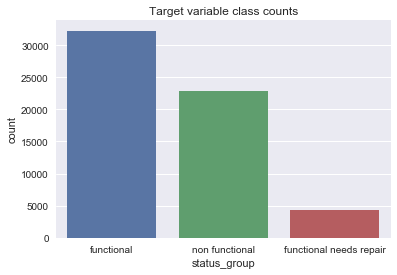

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


In [38]:
# number of each class in the training set
sns.countplot(train.status_group)
plt.title("Target variable class counts")
plt.show()
print(train.status_group.value_counts() / len(train.status_group))

### Predictor variables

There are 40 predictor variables in the original dataset, which can be classified into the following categories:

* **water origin information**: wpt_name, basin, amount_tsh, source, source_type, source_class, waterpoint_type, waterpoint_type_group
* **location information**: longitude, latitude, subvillage, region, region_code, district_code, lga, ward, population
* **party involved in constructing, managing, and funding the pump**: funder, installer, scheme management, scheme_name, management, management_group
* **pump information**: gps_height, date_recorded, recorded_by, public_meeting, permit, construction_year, extraction_type, extraction_type_group, extraction_type_class, payment, payment_type, water_quality, quality_group, quantity
* **others**: id, num_private

# 3. Data Cleaning

## 3-1. Cleaning text values

Funder and installer have over few thousand levels, but the same entities are often written in different or wrong ways. Some cleaning is required.

### Cleaning funder

In [39]:
# make everything lower case
train.funder = [str(i).lower() for i in train.funder]
test.funder = [str(i).lower() for i in test.funder]

In [40]:
# change null values back to NaN
train.loc[train.funder == 'nan','funder'] = np.nan
test.loc[test.funder == 'nan','funder'] = np.nan

In [41]:
# cleaning funder text
clean_funder = {
    'government of tanzania': 'government',
    '0': 'unknown',
    'germany republi': 'germany',
    'water': 'ministry of water',
    'rural water supply and sanitat': 'world bank',
    'jaica': 'jica',
    'rc': 'rc church',
    'oxfarm': 'oxfam',
    'finw': 'fini water',
    'plain int': 'plan international',
    'fw': 'fini water',
    'kkkt_makwale': 'kkkt church',
    'ces (gmbh)': 'ces(gmbh)',
    'nethalan': 'netherlands',
    'oikos e.afrika': 'oikos east africa',
    'mkinga distric coun': 'mkinga district council',
    'concern world wide': 'concern worldwide',
    'no': 'unknown',
    'swedish': 'sweden',
    'roman catholic': 'roman catholic church',
    'unice': 'unicef',
    'concern': 'concern worldwide',
    'villagers': 'village council',
    'hsw': 'hesawa',
    'tanza': 'ogvernment',
    'rc ch': 'rc church',
    'fin water': 'fini water',
    'kkkt': 'kkkt church',
    'water aid /sema': 'wateraid/sema',
    'conce': 'concern worldwide',
    'mkinga  distric cou': 'mkinga district council',
    'commu': 'community',
    'irish ai': 'ireland',
    'finida german tanzania govt': 'germany',
    'kilindi district co': 'kilindi district community',
    'cocen': 'concern worldwide',
    'china government': 'china',
    'european union': 'eu',
    'tz japan': 'japan',
    'holland': 'netherlands',
    'finn water': 'fini water',
    'oikos e.africa/european union': 'oikos east africa/eu',
    'dhv\\norp': 'dhv/norp',
    'the desk and chair foundat': 'desk and chair foundation',
    'jika': 'jica',
    'churc': 'church',
    'swiss if': 'switzerland',
    'cocern': 'concern worldwide',
    'finwater': 'fini water',
    'not known': 'unknown',
    'plan internatio': 'plan international',
    'nethe': 'netherlands',
    'kilwater': 'kili water',
    'kiliwater': 'kili water',
    'rc churc': 'rc church',
    'total land care': 'total landcare',
    'hewasa': 'hesawa',
    'roman cathoric-same': 'roman catholic church',
    'bank': 'world bank',
    'swisland/ mount meru flowers': 'switzerland/ mount meru flowers',
    'peace cope': 'peace corps',
    'the people of japan': 'japan',
    'tanzania': 'government',
    'one un': 'un',
    'sumbawanga munici': 'sumbawanga municipal',
    'finland government': 'finland',
    'lwiji italy': 'italy',
    'african relie': 'african relief',
    'roman cathoric same': 'roman catholic church',
    'us embassy': 'US',
    'roman catholic rulenge diocese': 'roman catholic church',
    'roman catholic church': 'roman catholic church',
    'jeica': 'jica',
    'franc': 'france',
    'oxfam gb': 'oxfam',
    'finidagermantanzania govt': 'finland',
    'dhv/gove': 'dhv/government',
    'belgian government': 'belgium',
    'people of japan': 'japan',
    'holla': 'netherlands',
    'british colonial government': 'england',
    'professor ben ohio university': 'private individual',
    'roman cathoric -kilomeni': 'roman catholic churnch',
    'hesaw': 'hesawa',
    'priva': 'private',
    'hesawz': 'hesawa',
    'rc cathoric': 'roman catholic church',
    'musilim agency': 'muslim agency',
    'netherland': 'netherlands',
    'unknown': 'unknown',
    'oikos e .africa/european union': 'oikos east africa/eu',
    'roman ca': 'roman catholic church',
    'concen': 'concern worldwide',
    'koica and tanzania government': 'koica/government',
    'japan embassy': 'japan',
    'italy government': 'italy',
    'colonial government': 'england',
    'holand': 'netherlands',
    'iran gover': 'iran',
    'bread for the wor': 'bread for the world',
    'swisland/mount meru flowers': 'switzerland/mount meru flowers',
    'british tanza': 'england',
    'redcross': 'red cross',
    'compa': 'company',
    'people from japan': 'japan',
    'irish government': 'ireland',
    'none': 'unknown',
    'swidish': 'sweden',
    'ox': 'oxfam',
    'roman catohric': 'roman catholic church',
    'foreigne': 'foreigner',
    'kkkt usa': 'kkkt church',
    'tanz/egypt technical  co-op': 'government/egypt',
    'swiss tr': 'switzerland',
    'hesawa and concern world wide': 'hesawa/concern worldwide',
    'fiwater': 'fini water',
    'japan  food aid counter part': 'japan',
    'friends of ulambo and mwanhala': 'friends of ulambo and mwanhala foundation',
    'kkkt ndrumangeni': 'kkkt church',
    'lottery': 'lottery club',
    'italian': 'italy',
    'government and community': 'government/community',
    'lotary international': 'lottary club',
    'plan tanzania': 'plan international',
    'dhv\\swis': 'dhv/switzerland',
    'oikos e.africa/ european union': 'oikos east africa/eu',
    'people from egypt': 'egypt',
    'nmdc india': 'india',
    'hesawwa': 'hesawa',
    'bread of the worl': 'bread of the world',
    'lion clu': 'lion club',
    'rotary club australia': 'lottary club australia',
    'farm-africa': 'farm africa',
    'friend from un': 'un',
    'kkkt canal': 'kkkt church',
    'afriican reli': 'african relief',
    'sweeden': 'sweden',
    'hearts helping hands.inc.': 'helping hearts helping hands',
    'tanzania /egypt': 'government/egypt',
    'nerthlands': 'netherlands',
    'hesawza': 'hesawa',
    'people of sweden': 'sweden',
    'kkkt mareu': 'kkkt church',
    'hewawa': 'hesawa',
    'private person': 'private individual',
    'tanzania egypt technical co op': 'government/egypt',
    'jipa': 'jica',
    'worldvision': 'world vision',
    'embasy of japan in tanzania': 'japan',
    'japan government': 'japan',
    'egypt government': 'egypt',
    'uniceg': 'unicef',
    'unicet': 'unicef',
    'unicrf': 'unicef',
    'uniseg': 'unicef',
    'heswa': 'hesawa',
    'danid': 'danida',
    'da': 'danida'
}

train.funder = train.funder.replace(clean_funder)
test.funder = test.funder.replace(clean_funder)

### Cleaning installer

In [42]:
# make everything lower case
train.installer = [str(i).lower() for i in train.installer]
test.installer = [str(i).lower() for i in test.installer]

In [43]:
# change null values back to NaN
train.loc[train.installer == 'nan','installer'] = np.nan
test.loc[test.installer == 'nan','installer'] = np.nan

In [44]:
# cleaning installer text
clean_installer = {
    'government of tanzania': 'government',
    'nan': 'unknown',
    '0': 'unknown',
    'germany republi': 'germany',
    'water': 'ministry of water',
    'rural water supply and sanitat': 'world bank',
    'jaica': 'jica',
    'rc': 'rc church',
    'oxfarm': 'oxfam',
    'finw': 'fini water',
    'plain int': 'plan international',
    'fw': 'fini water',
    'kkkt_makwale': 'kkkt church',
    'ces (gmbh)': 'ces(gmbh)',
    'nethalan': 'netherlands',
    'oikos e.afrika': 'oikos east africa',
    'mkinga distric coun': 'mkinga district council',
    'concern world wide': 'concern worldwide',
    'no': 'unknown',
    'swedish': 'sweden',
    'roman catholic': 'roman catholic church',
    'unice': 'unicef',
    'concern': 'concern worldwide',
    'villagers': 'village council',
    'hsw': 'hesawa',
    'tanza': 'ogvernment',
    'rc ch': 'rc church',
    'fin water': 'fini water',
    'kkkt': 'kkkt church',
    'water aid /sema': 'wateraid/sema',
    'conce': 'concern worldwide',
    'mkinga  distric cou': 'mkinga district council',
    'commu': 'community',
    'irish ai': 'ireland',
    'finida german tanzania govt': 'germany',
    'kilindi district co': 'kilindi district community',
    'cocen': 'concern worldwide',
    'china government': 'china',
    'european union': 'eu',
    'tz japan': 'japan',
    'holland': 'netherlands',
    'finn water': 'fini water',
    'oikos e.africa/european union': 'oikos east africa/eu',
    'dhv\\norp': 'dhv/norp',
    'the desk and chair foundat': 'desk and chair foundation',
    'jika': 'jica',
    'churc': 'church',
    'swiss if': 'switzerland',
    'cocern': 'concern worldwide',
    'finwater': 'fini water',
    'not known': 'no_funder',
    'plan internatio': 'plan international',
    'nethe': 'netherlands',
    'kilwater': 'kili water',
    'kiliwater': 'kili water',
    'rc churc': 'rc church',
    'total land care': 'total landcare',
    'hewasa': 'hesawa',
    'roman cathoric-same': 'roman catholic church',
    'bank': 'world bank',
    'swisland/ mount meru flowers': 'switzerland/ mount meru flowers',
    'peace cope': 'peace corps',
    'the people of japan': 'japan',
    'tanzania': 'government',
    'one un': 'un',
    'sumbawanga munici': 'sumbawanga municipal',
    'finland government': 'finland',
    'lwiji italy': 'italy',
    'african relie': 'african relief',
    'roman cathoric same': 'roman catholic church',
    'us embassy': 'US',
    'roman catholic rulenge diocese': 'roman catholic church',
    'roman catholic church': 'roman catholic church',
    'jeica': 'jica',
    'franc': 'france',
    'oxfam gb': 'oxfam',
    'finidagermantanzania govt': 'finland',
    'dhv/gove': 'dhv/government',
    'belgian government': 'belgium',
    'people of japan': 'japan',
    'holla': 'netherlands',
    'british colonial government': 'england',
    'professor ben ohio university': 'private individual',
    'roman cathoric -kilomeni': 'roman catholic churnch',
    'hesaw': 'hesawa',
    'priva': 'private',
    'hesawz': 'hesawa',
    'rc cathoric': 'roman catholic church',
    'musilim agency': 'muslim agency',
    'netherland': 'netherlands',
    'unknown': 'no_funder',
    'oikos e .africa/european union': 'oikos east africa/eu',
    'roman ca': 'roman catholic church',
    'concen': 'concern worldwide',
    'koica and tanzania government': 'koica/government',
    'japan embassy': 'japan',
    'italy government': 'italy',
    'colonial government': 'england',
    'holand': 'netherlands',
    'iran gover': 'iran',
    'bread for the wor': 'bread for the world',
    'swisland/mount meru flowers': 'switzerland/mount meru flowers',
    'british tanza': 'england',
    'redcross': 'red cross',
    'compa': 'company',
    'people from japan': 'japan',
    'irish government': 'ireland',
    'none': 'no_funder',
    'swidish': 'sweden',
    'ox': 'oxfam',
    'roman catohric': 'roman catholic church',
    'foreigne': 'foreigner',
    'kkkt usa': 'kkkt church',
    'tanz/egypt technical  co-op': 'government/egypt',
    'swiss tr': 'switzerland',
    'hesawa and concern world wide': 'hesawa/concern worldwide',
    'fiwater': 'fini water',
    'japan  food aid counter part': 'japan',
    'friends of ulambo and mwanhala': 'friends of ulambo and mwanhala foundation',
    'kkkt ndrumangeni': 'kkkt church',
    'lottery': 'lottery club',
    'italian': 'italy',
    'government and community': 'government/community',
    'lotary international': 'lottary club',
    'plan tanzania': 'plan international',
    'dhv\\swis': 'dhv/switzerland',
    'oikos e.africa/ european union': 'oikos east africa/eu',
    'people from egypt': 'egypt',
    'nmdc india': 'india',
    'hesawwa': 'hesawa',
    'bread of the worl': 'bread of the world',
    'lion clu': 'lion club',
    'rotary club australia': 'lottary club australia',
    'farm-africa': 'farm africa',
    'friend from un': 'un',
    'kkkt canal': 'kkkt church',
    'afriican reli': 'african relief',
    'sweeden': 'sweden',
    'hearts helping hands.inc.': 'helping hearts helping hands',
    'tanzania /egypt': 'government/egypt',
    'nerthlands': 'netherlands',
    'hesawza': 'hesawa',
    'people of sweden': 'sweden',
    'kkkt mareu': 'kkkt church',
    'hewawa': 'hesawa',
    'private person': 'private individual',
    'tanzania egypt technical co op': 'government/egypt',
    'jipa': 'jica',
    'worldvision': 'world vision',
    'embasy of japan in tanzania': 'japan',
    'japan government': 'japan',
    'egypt government': 'egypt',
    'uniceg': 'unicef',
    'unicet': 'unicef',
    'unicrf': 'unicef',
    'uniseg': 'unicef',
    'heswa': 'hesawa',
    'commu': 'community',
    'gover': 'government',
    'central government': 'government',
    'kkkt _ konde and dwe': 'kkkt church/dwe',
    'centr': 'government',
    'water aid': 'wateraid',
    'central govt': 'government',
    'mission': 'missionary',
    'ja': 'japan',
    'agrican': 'african',
    'kiliwater r': 'kili water',
    'kill water': 'kili water',
    'local': 'local technician',
    'local contract': 'local technician',
    'local l technician': 'local technician',
    'local te': 'local technician',
    'local technical': 'local technician',
    'local technical tec': 'local technician',
    'local  technician': 'local technician',
    'local technitian': 'local technician',
    'locall technician': 'local technician',
    'localtechnician': 'local technician',
    'american people': 'US',
    'belgij': 'belgium',
    'danid': 'danida',
    'da': 'danida'
}

train.installer = train.installer.replace(clean_installer)
test.installer = test.installer.replace(clean_installer)

## 3-2. NA value imputation

In [45]:
## missing values summary
print("Missing values in training data: ")
print(train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending = False))
print("\nMissing values in test data: ")
print(test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending = False))

Missing values in training data: 
scheme_name          28166
scheme_management     3877
installer             3655
funder                3635
public_meeting        3334
permit                3056
subvillage             371
dtype: int64

Missing values in test data: 
scheme_name          7092
scheme_management     969
installer             877
funder                869
public_meeting        821
permit                737
subvillage             99
dtype: int64


### NA: funder and installer

Funder and installer are too fragmented to impute specific values. Since the distribution of status group for rows with null funder/installer values are quite similar to the original data, we can create another level called 'unknown'.

/Users/jk6653284/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


functional                 0.544979
non functional             0.334801
functional needs repair    0.120220
Name: status_group, dtype: float64

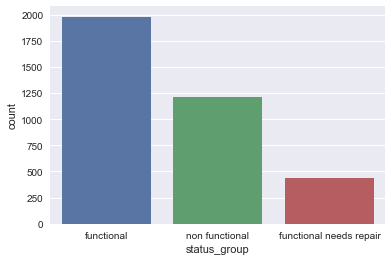

In [46]:
# distribution of target variable classes for null funder rows
sns.countplot(data = train[train.funder.isnull()], x = 'status_group')
train[train.funder.isnull()].status_group.value_counts() / len(train[train.funder.isnull()])

In [47]:
# impute with null values for both funder and installer with 'unknown'
train.funder = train.funder.fillna('unknown')
test.funder = test.funder.fillna('unknown')

train.installer = train.installer.fillna('unknown')
test.installer = test.installer.fillna('unknown')

### NA: subvillage

Since subvillage is a location value and we have the longitude and latitude values, we can use these 2 values to impute missing subvillage values. Locations with the most similar longitude and latitude values will probably belong to the same subvillage. A cross validation has been performed before and the best k value was 3, so we will use this value to train a KNN model and impute missing values.

In [48]:
# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# create separate dataframe only containing subvillage, latitude, and longitude
train_sv = train[['subvillage', 'latitude', 'longitude']]
sv_complete = train_sv.dropna(axis = 0)
sv_uncomplete = train_sv[train_sv.subvillage.isnull()].drop('subvillage', axis = 1)
sv_y = sv_complete.subvillage
sv_X = sv_complete.drop('subvillage', axis = 1)

test_sv = test[['subvillage', 'latitude', 'longitude']]
sv_complete_test = test_sv.dropna(axis = 0)
sv_uncomplete_test = test_sv[test_sv.subvillage.isnull()].drop('subvillage', axis = 1)
sv_y_test = sv_complete_test.subvillage
sv_X_test = sv_complete_test.drop('subvillage', axis = 1)

In [49]:
# impute using KNN(k=3)
train_subvillages = KNeighborsClassifier(3).fit(sv_X, sv_y).predict(sv_uncomplete)
test_subvillages = KNeighborsClassifier(3).fit(sv_X_test, sv_y_test).predict(sv_uncomplete_test)

# assign back to original dataset
train.loc[train.subvillage.isnull(),'subvillage'] = train_subvillages
test.loc[test.subvillage.isnull(),'subvillage'] = test_subvillages

### NA:  public_meeting

/Users/jk6653284/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


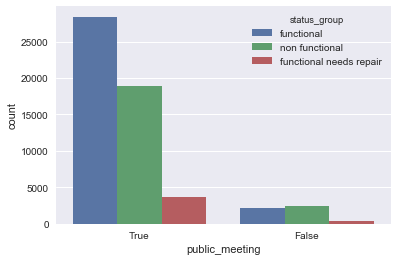

In [50]:
sns.countplot(data = train, x = 'public_meeting', hue = 'status_group')
plt.show()

The ```public_meeting``` vaules are predominantly ```True```, but the shape of distribution of ```status_group``` between the 2 values are different. It is safer to just create another level to treat missing values to not affect the distribution.

In [51]:
# fill public_meeting missing value with 'unknown'
train.public_meeting = train.public_meeting.fillna('unknown')
test.public_meeting = test.public_meeting.fillna('unknown')

### NA: permit
Permit is given to each waterpoint, but since the waterpoint_names are extrmeley fragmented, we will use the mode permit values for each water point type to fill in the NA values.

/Users/jk6653284/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


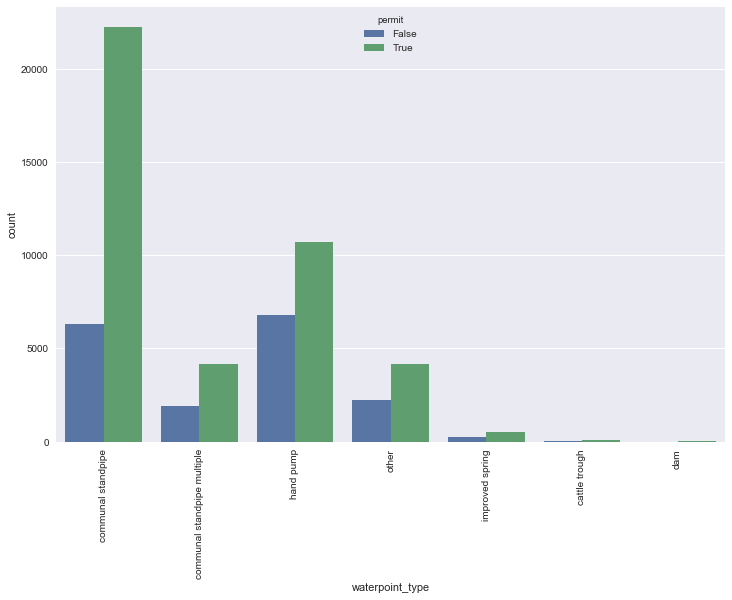

In [54]:
plt.figure(figsize=(12,8))
sns.countplot(data = train, x = 'waterpoint_type', hue = 'permit')
plt.xticks(rotation = 90)
plt.show()

In [53]:
# fill in mode values, which in this case is True for all
train.permit = train.permit.fillna(True)
test.permit = train.permit.fillna(True)

### NA: scheme management & scheme name
The predominant value for scheme management is VWC, so for now we can impute the mode value to every null values. We won't impute scheme name as they are too fragmented, and unlike the funder and the installer, don't seem to provide any useful additional information. We will drop this column later.

In [55]:
# impute null scheme management values with mode value 'VWC'
train.scheme_management = train.scheme_management.fillna('VWC')
test.scheme_management = test.scheme_management.fillna('VWC')

## 3-3. Outliers and faulty values

While most of the variables in this dataset are categorical (i.e., not easy to define 'outliers'), the small number of continuous variables have noticeable problems, which is the abundance of 0.

For example, both population and amount_tsh have too many 0 (and other small values) that affect the shape of distribution. If we exclude 0s and apply log transformation, then we see that there is a hidden shape in the distribution of continuous variables.

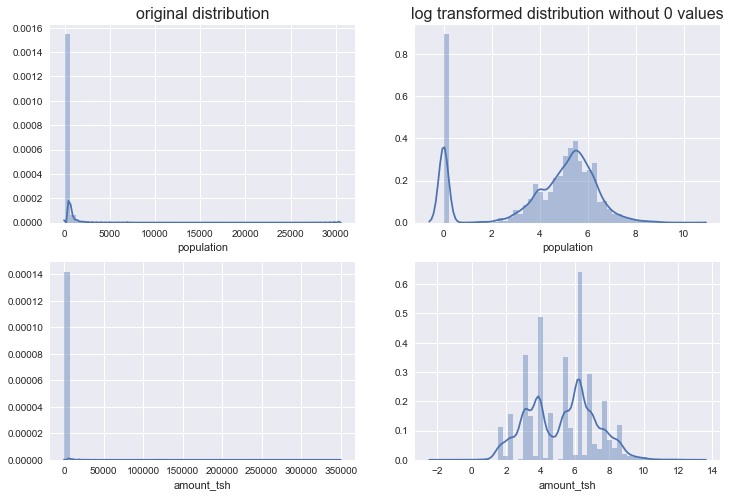

In [83]:
# plot distribution of population and amount_tsh
fig = plt.figure(figsize = (12,8))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

sns.distplot(train.population, ax = ax0)
ax0.set_title("original distribution", size = 16)

sns.distplot(train[train.population > 0.0].population.apply(lambda x : np.log(x)), ax = ax1)
ax1.set_title("log transformed distribution without 0 values", size = 16)

sns.distplot(train.amount_tsh, ax = ax2)

sns.distplot(train[train.amount_tsh > 0.0].amount_tsh.apply(lambda x : np.log(x)), ax = ax3)

plt.show()

A more complicated problem comes from construction year, mainly because unlike amount_tsh or population, you cannot naively assume that the value can be a true 0 value as it is a date information. In most cases binning would lose some information, but in this case it may be better to bin the date values and categorize the 0 values as 'unknown' so that the imputation doesn't distort the data.

/Users/jk6653284/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


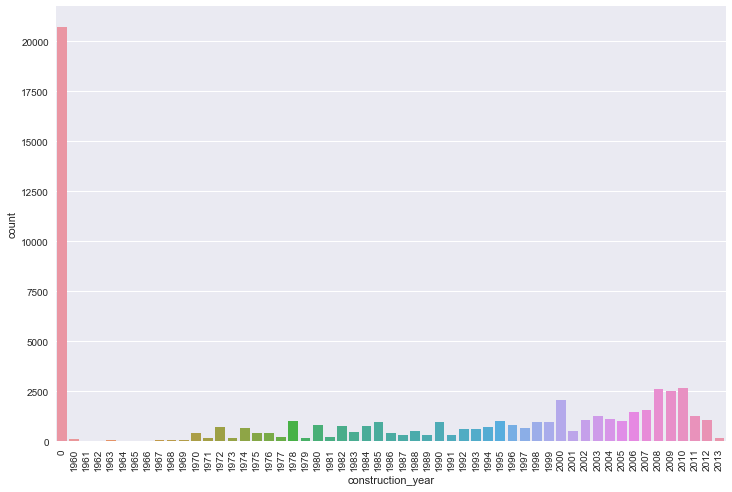

In [88]:
plt.figure(figsize = (12,8))
sns.countplot(train.construction_year)
plt.xticks(rotation = 90)
plt.show()

# 4. Exploratory Data Analysis

/Users/jk6653284/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/jk6653284/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/jk6653284/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jk6653284/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/jk6653284/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269:

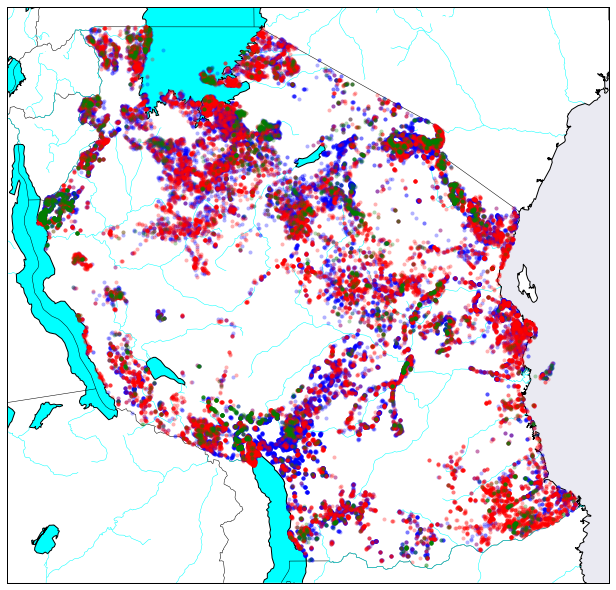

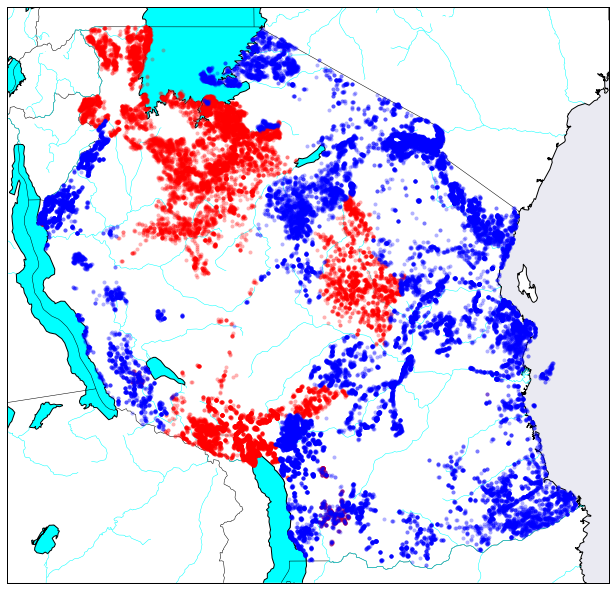

In [24]:
# plotting data on a map with latitude and longitude values
# where blue: functional, green: functional but requiring repair,
# and red: non functional

# import basemap
from mpl_toolkits.basemap import Basemap
# create new figure, axes instances
fig = plt.figure(figsize = (12,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection
m = Basemap(projection = 'merc',
            llcrnrlon = 29.00000, llcrnrlat = -12.00000,
           urcrnrlon = 41.00000, urcrnrlat = -0.60000,
           resolution = 'i', area_thresh = 1000.0)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(lake_color = 'aqua', color = 'white')
m.drawmapboundary()
m.drawrivers(color = 'aqua')



x_1,y_1 = m(train[train.status_group == 'functional'].longitude.tolist(), 
        train[train.status_group == 'functional'].latitude.tolist())
x_2,y_2 = m(train[train.status_group == 'non functional'].longitude.tolist(), 
        train[train.status_group == 'non functional'].latitude.tolist())
x_3,y_3 = m(train[train.status_group == 'functional needs repair'].longitude.tolist(), 
        train[train.status_group == 'functional needs repair'].latitude.tolist())



m.plot(x_1,y_1, 'bo', markersize = 4, alpha = 0.3)
m.plot(x_2,y_2, 'ro', markersize = 4, alpha = 0.3)
m.plot(x_3,y_3, 'go', markersize = 4, alpha = 0.3)
plt.show()


# plotting locations with 0 populations and locations with non-zero population

# create new figure, axes instances
fig = plt.figure(figsize = (12,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection
m = Basemap(projection = 'merc',
            llcrnrlon = 29.00000, llcrnrlat = -12.00000,
           urcrnrlon = 41.00000, urcrnrlat = -0.60000,
           resolution = 'i', area_thresh = 1000.0)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(lake_color = 'aqua', color = 'white')
m.drawmapboundary()
m.drawrivers(color = 'aqua')



x_1,y_1 = m(train[train.population == 0.0].longitude.tolist(), 
        train[train.population == 0.0].latitude.tolist())
x_2,y_2 = m(train[train.population != 0.0].longitude.tolist(), 
        train[train.population != 0.0].latitude.tolist())


m.plot(x_1,y_1, 'ro', markersize = 4, alpha = 0.3)
m.plot(x_2,y_2, 'bo', markersize = 4, alpha = 0.3)
plt.show()

While individually the plots don't tell us much (it doesn't seem like location itself is a deterministic factor of the status of the water pump), It seems like that pumps that are functional but requiring repar (green spots in first map) coincide with the locations where populations exist (blue spots in second map). This may make sense because if there a lot of population using the water pump, then the constant usage may more easily break the pump.

/Users/jk6653284/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


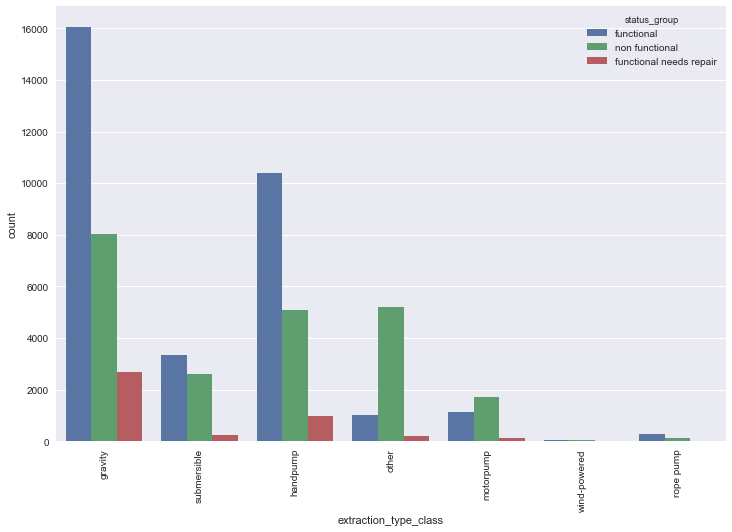

In [33]:
# extraction type class countplot
plt.figure(figsize=(12,8))
sns.countplot(train.extraction_type_class, hue = train.status_group)
plt.xticks(rotation = 90)
plt.show()

It seems that motorpump and 'other' pumping type has the most non-functional water pumps. This alone however doesn't tell us too much, because it may be the case that the machinery itself is old (e.g. was installed 50 years ago), and thus broke down due to age. Let's have a look at when the pumps were constructed.

/Users/jk6653284/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


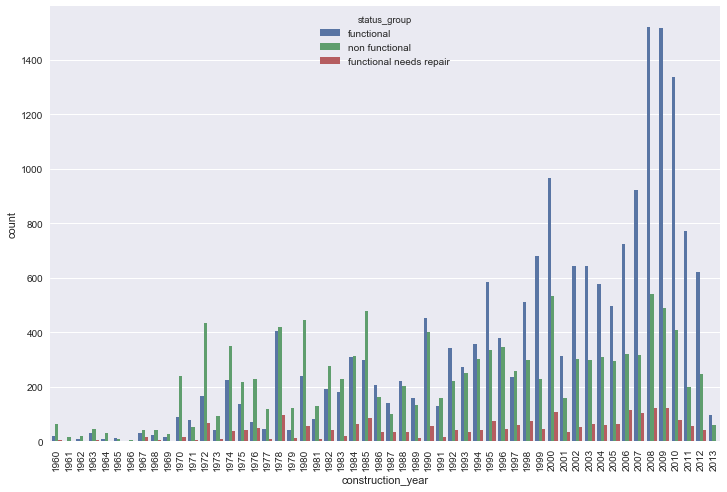

In [29]:
# countplot of pumps by construction year
# note that 0 was excluded because there are too many 0 values
plt.figure(figsize=(12,8))
sns.countplot(data = train[(train.construction_year > 0) & (train.extraction_type_class.isin(['gravity','handpump','other','motorpump']))],
              x = 'construction_year', 
              hue = 'status_group')
plt.xticks(rotation = 90)
plt.show()

Here we see a clear pattern here. The non-functional pumps (green) are more abundant as we go back in time. Thus, the age of pump seem to affect the functionality for sure. This also indicates that most pumps are neglected and are not managed properly.

/Users/jk6653284/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


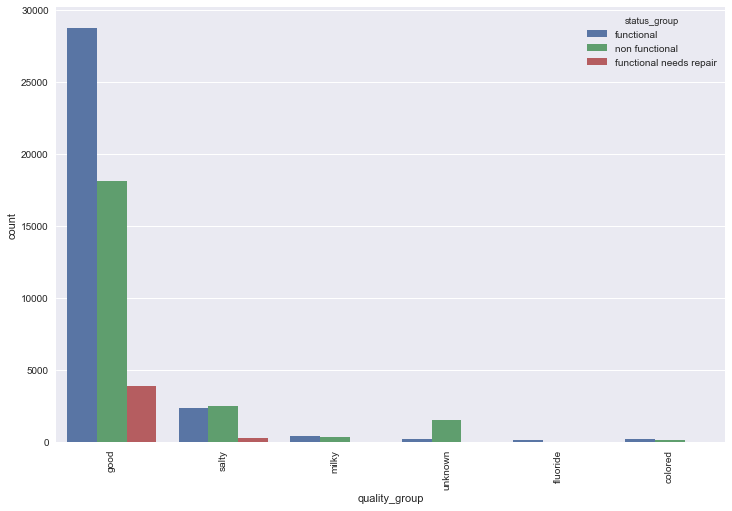

In [31]:
# water quality
plt.figure(figsize = (12,8))
sns.countplot(train.quality_group, hue = train.status_group)
plt.xticks(rotation = 90)
plt.show()

Salty and unknown water quality seems to have the highest proportion of non functional water pumps. This makes sense because salt corrodes metal and often tends to reside within the pump if not managed properly, which all contribute to making the pump breaking down easily.

/Users/jk6653284/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


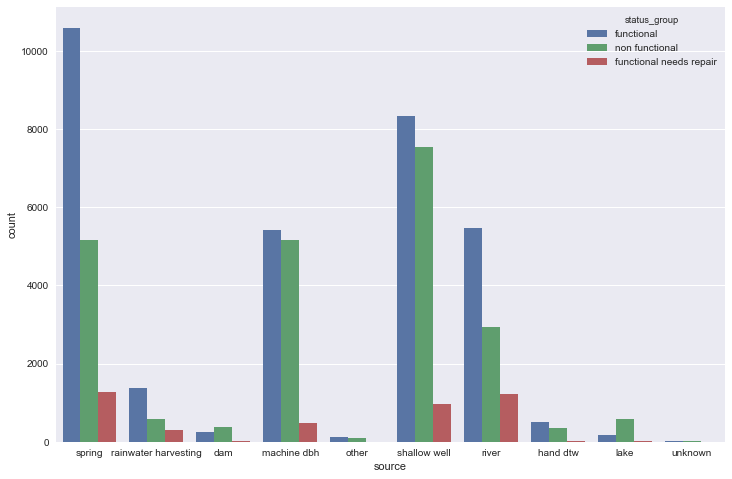

In [32]:
# countplot of water source
plt.figure(figsize = (12,8))
sns.countplot(train.source, hue = train.status_group)
plt.show()

In terms of source of water, it seems that water from the lake or the dam seem to have the most non functional pumps. One common characteristic between the 2 are that water don't really migrate to other locations and thus don't seem to 'float'. In fact, if we look at other sources with high proportion of non functional pumps like shallow well, we see that they have water confined in one place.

# 5. Feature Engineering

## 5-1. Feature creation

Both funder and installer have too many levels. It would be more meaningful to create a higher level group. The apparenty bodies look like government, local communities, religious groups, ngos, foreign government, and join projects.

Another characteristic is that the top funders and installers take a large portion of the observations. Thus, it would be meaningful to create another variable that only keeps the top funders/intallers and group other groups as 'others'.

Finally, in many cases, the funders and the installers are the same entities. a variable to see whether or not the entities are the same would also be interesting.

In [89]:
# creating higher level funder group 

# lists
countries = ['egypt', 'korea', 'india', 'netherlands', 'germany',
            'belgium', 'england','japan','kuwait','switzerland','US',
            'finland', 'china','france','us','italy','canada', 'sweden',
            'jica']
ngos = ['ngo', 'eu', 'world', 'save', 'total', 'peace','international',
       'un', 'group', 'project', 'fund', 'foundation',
       'helping', 'red cross']
religion = ['church', 'kkkt', 'bread for', 'islam', 'catholic', 'roman',
           'christ', 'muslim']

def group_funder(data):
    # empty column to return back
    fund_group = []
    
    for i in range(len(data['funder'])):
        # assign string variables
        f = data.loc[i,'funder']
        
        if f == 'unknown':
            fund_group.append('unknown')
            
        # government
        elif ('gov' in f) and ('/' not in f) and ('&' not in f):
            fund_group.append('government')
        elif ('minis' in f):
            fund_group.append('government')
        elif ('dist') in f:
            fund_group.append('government')
        elif ('counc') in f:
            fund_group.append('government')
        elif ('munic') in f:
            fund_group.append('government')
        elif ('departm' in f):
            fund_group.append('government')

        # community
        elif ('vill' in f) and ('/' not in f):
            fund_group.append('community')
        elif ('comm' in f) and ('/' not in f):
            fund_group.append('community')

        # foreign countries
        elif f in countries:
            fund_group.append('foreign')

        # ngos
        elif f in ngos:
            fund_group.append('ngo')
        elif ('world' in f) or ('foundation' in f) or ('group' in f) or ('fund' in f) or ('international' in f):
            fund_group.append('ngo')
        elif ('eu' in f) or ('unicef' in f) or ('desk' in f):
            fund_group.append('ngo')
        elif ('save' in f) or ('total' in f) or ('peace' in f) or ('project' in f) or ('helping' in f):
            fund_group.append('ngo')
        elif (('action' in f) or ('wateraid' in f) or ('care' in f)) and ('/' not in f):
            fund_group.append('ngo')
        elif ('oxfam' in f) or ('afric' in f) or ('ngo' in f) or ('plan int' in f):
            fund_group.append('ngo')

        # religions
        elif f in religion:
            fund_group.append('religion')
        elif ('missi' in f) or ('mision' in f):
            fund_group.append('religion')
        elif ('church' in f) or ('kkkt' in f) or ('roman' in f) or ('islam' in f) or ('bread' in f) or ('catho' in f) or ('christ' in f) or ('musli' in f):
            fund_group.append('religion')
        elif ('chur' in f):
            fund_group.append('religion')

        # joint projects
        elif (('/' in f) or ((' ' in f) and ('and' in f)) or ('&' in f)):
            fund_group.append('joint project')

        else:
            fund_group.append('others')
    
    return fund_group
        
# append group to data
train['fund_group'] = group_funder(train)
test['fund_group'] = group_funder(test)

In [90]:
# creating higher level installer group 

def group_installer(data):
    # empty column to return back
    inst_group = []
    
    for i in range(len(data.installer)):
        # assign string variables
        f = data.loc[i,'installer']

        if f == 'unknown':
            inst_group.append('unknown')

        # government
        elif ('gov' in f) and ('/' not in f) and ('&' not in f):
            inst_group.append('government')
        elif ('minis' in f):
            inst_group.append('government')
        elif ('dist') in f:
            inst_group.append('government')
        elif ('counc') in f:
            inst_group.append('government')
        elif ('munic') in f:
            inst_group.append('government')
        elif ('departm' in f):
            inst_group.append('government')
        elif ('region' in f):
            inst_group.append('government')

        # community
        elif ('vill' in f) and ('/' not in f):
            inst_group.append('community')
        elif ('comm' in f) and ('/' not in f):
            inst_group.append('community')

        # foreign countries
        elif f in countries:
            inst_group.append('foreign')
        elif 'itali' in f:
            inst_group.append('foreign')

        # ngos
        elif f in ngos:
            inst_group.append('ngo')
        elif ('world' in f) or ('foundation' in f) or ('group' in f) or ('fund' in f) or ('international' in f):
            inst_group.append('ngo')
        elif ('eu' in f) or ('unicef' in f) or ('desk' in f):
            inst_group.append('ngo')
        elif ('save' in f) or ('total' in f) or ('peace' in f) or ('project' in f) or ('helping' in f):
            inst_group.append('ngo')
        elif (('action' in f) or ('wateraid' in f) or ('care' in f)) and ('/' not in f):
            inst_group.append('ngo')
        elif ('oxfam' in f) or ('afric' in f) or ('ngo' in f) or ('plan int' in f):
            inst_group.append('ngo')
        elif ('unisef' in f) or ('interna' in f):
            inst_group.append('ngo')


        # religions
        elif f in religion:
            inst_group.append('religion')
        elif ('missi' in f) or ('mision' in f):
            inst_group.append('religion')
        elif ('church' in f) or ('kkkt' in f) or ('roman' in f) or ('islam' in f) or ('bread' in f) or ('catho' in f) or ('christ' in f) or ('musli' in f):
            inst_group.append('religion')
        elif ('chur' in f) or ('kkt' in f):
            inst_group.append('religion')

        # joint projects
        elif (('/' in f) or ((' ' in f) and ('and' in f)) or ('&' in f)):
            inst_group.append('joint project')

        # local technicians
        elif 'local' in f:
            inst_group.append('local')

        else:
            inst_group.append('others')   
            
    return inst_group

# append group to data
train['inst_group'] = group_installer(train)
test['inst_group'] = group_installer(test)

In [91]:
# create variable that contains top 20 funders
# to ensure that train and test have the same number of funders available,
# get a list of top 20 funders together
top_20_funder_train = train.funder.value_counts().sort_values(ascending = False)[:21].index.tolist()
top_20_funder_test = test.funder.value_counts().sort_values(ascending = False)[:21].index.tolist()

top_20_funders = np.unique(top_20_funder_train + top_20_funder_test)

train['top_20_funder'] = [i if i in top_20_funders else 'others' for i in train.funder]
test['top_20_funder'] = [i if i in top_20_funders else 'others' for i in test.funder]

In [92]:
# create another with top 10 funders
top_10_funders = train.top_20_funder.value_counts()[:11].index.tolist()
train['top_10_funder'] = [i if i in top_10_funders else 'others' for i in train.funder]
test['top_10_funder'] = [i if i in top_10_funders else 'others' for i in test.funder]

In [93]:
# create variable that contains top 20 installers
# to ensure that train and test have the same number of installers available,
# get a list of top 20 installers together
top_20_installer_train = train.installer.value_counts().sort_values(ascending = False)[:21].index.tolist()
top_20_installer_test = test.installer.value_counts().sort_values(ascending = False)[:21].index.tolist()

top_20_installers = np.unique(top_20_installer_train + top_20_installer_test)

train['top_20_installer'] = [i if i in top_20_installers else 'others' for i in train.installer]
test['top_20_installer'] = [i if i in top_20_installers else 'others' for i in test.installer]

In [94]:
# create another with top 10 installers
top_10_installers = train.top_20_installer.value_counts()[:11].index.tolist()
train['top_10_installer'] = [i if i in top_10_installers else 'others' for i in train.installer]
test['top_10_installer'] = [i if i in top_10_installers else 'others' for i in test.installer]

In [95]:
# create variable that checks whether or not funder and installer are the same
train['funder_installer_same'] = [1 if train.loc[i,'funder'] == train.loc[i,'installer'] else 0 for i in range(len(train.funder))]
test['funder_installer_same'] = [1 if test.loc[i,'funder'] == test.loc[i,'installer'] else 0 for i in range(len(test.funder))]


We have seen that the state of the well deteriorates as the construction year gets earlier. We can create a new variable that reflects the actual age of the pump at the time of record by subtracting age at record by construction year. 

There are some weird cases where the construction year is newer than the time of record, and there are also cases where the construction year is 0, resulting in a negative age in both cases. We will mark both of these as 0 for now.

In [96]:
# create new variable that shows age of pump
# change date_recorded to datetime
train['date_recorded_dt'] = pd.to_datetime(train.date_recorded)
test['date_recorded_dt'] = pd.to_datetime(test.date_recorded)

# create new variable measuring the actual age of well
# at the time of recording
train['age_at_record'] = [train.date_recorded_dt[i].year - train.construction_year[i] if (train.date_recorded_dt[i].year > train.construction_year[i]) & (train.construction_year[i] >0.0) else 0 for i in range(len(train))]
test['age_at_record'] = [test.date_recorded_dt[i].year - test.construction_year[i] if (test.date_recorded_dt[i].year > test.construction_year[i])& (train.construction_year[i] >0.0) else 0 for i in range(len(test))]

We can also create month values of when the date was recorded. It may be the case that in summer seasons where rivers dry up, the wells recorded at that time may be non functional more often than in the monsoon season.

In [97]:
# get monthly data
train['month'] = train.date_recorded_dt.dt.month.tolist()
test['month'] = test.date_recorded_dt.dt.month.tolist()

# replace number to month names
train.month = train.month.replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 
          5: 'May', 6: 'June', 7:'July', 8: 'August', 9: 'September',
          10: 'October',11:'November',12:'December'})
test.month = test.month.replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 
          5: 'May', 6: 'June', 7:'July', 8: 'August', 9: 'September',
          10: 'October',11:'November',12:'December'})

Using the month data, we can also scrape weather information of each region that may have an impact on the condition of the well.

In [99]:
import requests
from bs4 import BeautifulSoup

# scrapping weather data by region
page = requests.get("https://weather-and-climate.com/average-monthly-Rainfall-Temperature-Sunshine-in-Tanzania")
soup = BeautifulSoup(page.content, 'html.parser')

# getting region names
regions = []
for li in soup.findAll('li'):
    if li.a:
        regions.append(li.a.contents)
regions = regions[6:len(regions) - 20]
regions = [i[0] for i in regions]

# getting region names for scraping
regions_link = []
for li in soup.findAll('li'):
    if li.a:
        if 'Tanzania' in li.a['href']:
            regions_link.append(li.a['href'].split("Sunshine")[1].split(",")[1])
regions_link = regions_link[2:]

# parsing weather data by each region for each month
source = "https://weather-and-climate.com/"
months = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November',
         'December']
labels = ['°C', 'mm', '%']

weather_datas = dict()

for r in regions_link:
    weather_datas[r] = dict()
    for m in months:
        page = requests.get(source+r+"-"+m+"-"+"averages")
        soup = BeautifulSoup(page.content, 'html.parser')
        
        weather_data = []
        for s in soup.findAll('span'):
            if len(s.contents) > 0:
                for l in labels:
                    if l in s.contents[0]:
                        weather_data.append(s.contents[0])
        weather_datas[r][m] = weather_data

# parse to each weather info type
min_temp = dict()
max_temp = dict()
avg_rain = dict()
avg_hum = dict()

for r in weather_datas:
    min_temp[r] = dict()
    max_temp[r] = dict()
    avg_rain[r] = dict()
    avg_hum[r] = dict()
    
    for m in months:
        if r == 'Arusha':
            min_temp[r][m] = weather_datas[r][m][0]
            max_temp[r][m] = weather_datas[r][m][1]
            avg_rain[r][m] = weather_datas[r][m][2]
            avg_hum[r][m] = weather_datas[r][m][3]
        elif (r == 'Dar-Es-Salaam') or (r == 'Mtwara'):
            min_temp[r][m] = weather_datas[r][m][0]
            max_temp[r][m] = weather_datas[r][m][1]
            avg_rain[r][m] = weather_datas[r][m][4]
            avg_hum[r][m] = weather_datas[r][m][5]
        elif r in ['Dodoma', 'Kigoma', 'musoma-tz', 'Mwanza', 'pwani-mchangani-zanzibar-tz',
         'Tabora','Songea','Tanga']:
            min_temp[r][m] = weather_datas[r][m][0]
            max_temp[r][m] = weather_datas[r][m][1]
            avg_rain[r][m] = weather_datas[r][m][3]
            avg_hum[r][m] = weather_datas[r][m][4]

In [100]:
# lower case regions
train.region = [str(i).lower() for i in train.region]
test.region = [str(i).lower() for i in test.region]
regions = [i.lower() for i in regions]

# some regions do not have weather information
# get weather based on closest other location in that case
regions_replacement = {'iringa': 'dodoma',
                       'kagera': 'mwanza',
                       'kilimanjaro': 'arusha',
                       'lindi': 'mtwara',
                       'manyara': 'arusha',
                       'mara': 'musoma',
                       'mbeya': 'tabora',
                       'morogoro': 'pwani mchangani',
                       'pwani': 'pwani mchangani',
                       'rukwa':'tabora',
                       'ruvuma':'songea',
                       'shinyanga': 'mwanza',
                       'singida': 'tabora'
}

# get weather data for training data
for i in range(len(train)):
    if train.loc[i,'region'] in regions:
        ind = regions.index(train.loc[i, 'region'])
        reg = regions_link[ind]
        mon = train.loc[i,'month']
        train.loc[i,'min_temp'] = min_temp[reg][mon]
        train.loc[i,'max_temp'] = max_temp[reg][mon]
        train.loc[i,'avg_rain'] = avg_rain[reg][mon]
        train.loc[i,'avg_hum'] = avg_hum[reg][mon]
    else:
        new_reg = regions_replacement[train.loc[i,'region']]
        ind = regions.index(new_reg)
        reg = regions_link[ind]
        mon = train.loc[i,'month']
        train.loc[i,'min_temp'] = min_temp[reg][mon]
        train.loc[i,'max_temp'] = max_temp[reg][mon]
        train.loc[i,'avg_rain'] = avg_rain[reg][mon]
        train.loc[i,'avg_hum'] = avg_hum[reg][mon]
        
        
# get weather data for test data
for i in range(len(test)):
    if test.loc[i,'region'] in regions:
        ind = regions.index(test.loc[i, 'region'])
        reg = regions_link[ind]
        mon = test.loc[i,'month']
        test.loc[i,'min_temp'] = min_temp[reg][mon]
        test.loc[i,'max_temp'] = max_temp[reg][mon]
        test.loc[i,'avg_rain'] = avg_rain[reg][mon]
        test.loc[i,'avg_hum'] = avg_hum[reg][mon]
    else:
        new_reg = regions_replacement[test.loc[i,'region']]
        ind = regions.index(new_reg)
        reg = regions_link[ind]
        mon = test.loc[i,'month']
        test.loc[i,'min_temp'] = min_temp[reg][mon]
        test.loc[i,'max_temp'] = max_temp[reg][mon]
        test.loc[i,'avg_rain'] = avg_rain[reg][mon]
        test.loc[i,'avg_hum'] = avg_hum[reg][mon]

In [101]:
# fix wrong values
# dodoma region doesn't have rain during these months
train.loc[(train.region.isin(['dodoma', 'iringa'])) & (train.month.isin(['October', 'November', 'December'])),'avg_hum'] = train[(train.region.isin(['dodoma', 'iringa'])) & (train.month.isin(['October', 'November', 'December']))].avg_rain
train.loc[(train.region.isin(['dodoma', 'iringa'])) & (train.month.isin(['October', 'November', 'December'])),'avg_rain'] = 0
test.loc[(test.region.isin(['dodoma', 'iringa'])) & (test.month.isin(['October', 'November', 'December'])),'avg_hum'] =  test[(test.region.isin(['dodoma', 'iringa'])) & (test.month.isin(['October', 'November', 'December']))].avg_rain
test.loc[(test.region.isin(['dodoma', 'iringa'])) & (test.month.isin(['October', 'November', 'December'])),'avg_rain'] = 0

# strip characters from training set
train.min_temp = [float(str(i).split("°C")[0]) for i in train.min_temp]
train.max_temp = [float(str(i).split("°C")[0]) for i in train.max_temp]
train.avg_rain = [float(str(i).split("mm")[0].replace(',','')) for i in train.avg_rain]
train.avg_hum = [float(str(i).split("%")[0]) for i in train.avg_hum]

# strip characters from test set
test.min_temp = [float(str(i).split("°C")[0]) for i in test.min_temp]
test.max_temp = [float(str(i).split("°C")[0]) for i in test.max_temp]
test.avg_rain = [float(str(i).split("mm")[0].replace(',','')) for i in test.avg_rain]
test.avg_hum = [float(str(i).split("%")[0]) for i in test.avg_hum]

In [102]:
# avg temp by taking average of minimum temperature and maximum temperature
train['avg_temp'] = (train.min_temp + train.max_temp)/2
test['avg_temp'] = (test.min_temp + test.max_temp)/2

Since there are too many 0 values for the construction year, and the distribution is widely spread, it may make sense to try and bin the construction years.

/Users/jk6653284/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


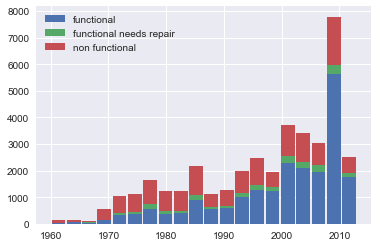

In [103]:
# view possible binning of construction_year
hist1=train[(train.construction_year > 0.0)&(train.status_group == 'functional')].construction_year
hist2=train[(train.construction_year > 0.0)&(train.status_group == 'functional needs repair')].construction_year
hist3=train[(train.construction_year > 0.0)&(train.status_group == 'non functional')].construction_year

n,b,p=plt.hist([hist1, hist2, hist3], stacked=True, rwidth = 0.9, bins = 20)
plt.legend(['functional','functional needs repair','non functional'],loc=0)
plt.show()

In [104]:
# bin construction year by every 5 years
# where 0's will be categorized as 'unknown'
def bin_year(data):
    construction_year_cat = []
    for i in data.construction_year:
        if i >= 1960 and i < 1965:
            construction_year_cat.append('1960s_1')
        elif i >= 1965 and i < 1970:
            construction_year_cat.append('1960s_2')
        elif i >= 1970 and i < 1975:
            construction_year_cat.append('1970s_1')
        elif i >= 1975 and i < 1980:
            construction_year_cat.append('1970s_2')
        elif i >= 1980 and i < 1985:
            construction_year_cat.append('1980s_1')
        elif i >= 1985 and i < 1990:
            construction_year_cat.append('1980s_2')
        elif i >= 1990 and i < 1995:
            construction_year_cat.append('1990s_1')
        elif i >= 1995 and i < 2000:
            construction_year_cat.append('1990s_2')
        elif i >= 2000 and i < 2005:
            construction_year_cat.append('2000s_1')
        elif i >= 2005 and i < 2010:
            construction_year_cat.append('2000s_2')
        elif i >= 2010:
            construction_year_cat.append('2010s')
        else:
            construction_year_cat.append('unknown')
            
    return construction_year_cat

# return new variables to original data
train['construction_year_cat'] = bin_year(train)
test['construction_year_cat'] = bin_year(test)

Region_code and district_code are numbers, but actually categorical variables. We need to change the data type as object.

In [105]:
# management_group other level
top_management = train['management'].value_counts()[:7].index.tolist()
train['management_group_2'] = [i if i in top_management else 'others' for i in train.management]
test['management_group_2'] = [i if i in top_management else 'others' for i in test.management]

In [106]:
# waterpoint_group other level
train['waterpoint_type_group2'] = [i if i in ['communal standpipe','hand pump','improved spring'] else 'others' for i in train.waterpoint_type_group]
test['waterpoint_type_group2'] = [i if i in ['communal standpipe','hand pump','improved spring'] else 'others' for i in test.waterpoint_type_group]

## 5-2. Feature transformation

Some variables have too many 0 values, despite being continuous variables (amount_tsh, population, age_at_record). Due to this, it is necessary to trasnform the values so that the effect of 0 is less so. While there are many hurdle or zero-inflated models to treat this, we will leave the 0 as they are and only transform positive values using boxcox transformation.

In [107]:
from scipy.stats import boxcox
# create function to transform variable
def transform_variable(data,feature):
    # list of transformed positive values
    transformed = list(boxcox(data[data[feature] >0.0][feature])[0])
    
    # empty array to append transformed values
    trans = []
    for i in data[feature]:
        # if value is 0, leave it as 0
        if i == 0.0:
            trans.append(0.0)
        # append positive transformed values using pop command
        else:
            trans.append(transformed.pop(0))
    return trans

In [108]:
# transform train variables
train['amount_transformed'] = transform_variable(train,'amount_tsh')
train['population_transformed'] = transform_variable(train,'population')
train['age_at_record_transformed'] = transform_variable(train,'age_at_record')
train['min_temp_transformed'] = transform_variable(train,'min_temp')
train['max_temp_transformed'] = transform_variable(train,'max_temp')
train['avg_rain_transformed'] = transform_variable(train,'avg_rain')
train['avg_hum_transformed'] = transform_variable(train,'avg_hum')
train['avg_temp_transformed'] = transform_variable(train,'avg_temp')

# transform test variables
test['amount_transformed'] = transform_variable(test,'amount_tsh')
test['population_transformed'] = transform_variable(test,'population')
test['age_at_record_transformed'] = transform_variable(test,'age_at_record')
test['min_temp_transformed'] = transform_variable(test,'min_temp')
test['max_temp_transformed'] = transform_variable(test,'max_temp')
test['avg_rain_transformed'] = transform_variable(test,'avg_rain')
test['avg_hum_transformed'] = transform_variable(test,'avg_hum')
test['avg_temp_transformed'] = transform_variable(test,'avg_temp')

In [109]:
# change region_code and district_code data type
train[['region_code', 'district_code']] = train[['region_code', 'district_code']].astype('object')
test[['region_code', 'district_code']] = test[['region_code', 'district_code']].astype('object')

In [114]:
# we'll also change the boolean types to 1 and 0 so that
# they don't need to be transformed into dummy variable

train.permit = train.permit.replace({True: 1, False: 0})
test.permit = train.permit.replace({True: 1, False: 0})

In [115]:
# export dataset as of now
#train.to_csv("train_cleaned_20180330.csv")
#test.to_csv("test_cleaned_20180330.csv")

## 5-3. Feature selection

Numerous features were dropped because they added no value to the data:
* recorded_by: only one value in entire column
* num_private: no information as to what this variable is
* payment_type: exact same information as payment
* quantity_group: exact same information as quantity
* waterpoint_type_group: same information as waterpoint_type
* source_class, source_type: same information as source
* quality group: same information as quality
* management_group: same information as management
* extraction_type, extraction_type_class: same information as extraction_type_group
* gps_height

Many location variables had to be dropped too due to duplicate information:
* longitude/latitude: hard to include geographical numeric values as variables (numbers are netiher continuous or discrete, and cannot be binned)
* ward: too many levels, but doesn't make sense to get 'top' values like funder or installer
* subvillage: same as ward
* lga: same as ward
* wpt_name: too many levels, and information is partially reflected by waterpoint_type
* scheme_name: too many levels

Other features were discarded as the newly created features reflect similar information.
* funder: cleaned with fund_group and top_20_funder
* installer: cleaned with inst_group and top_20_installer
* construction_year: replaced with age at record and categorized construction year values
* amount_tsh, population, age_at_record, min_temp, max_temp, avg_rain, avg_hum: replaced with transformed values

In [116]:
# shape of data before feature selection
print("shape of training set before feature selection:",train.shape)
print("shape of test set before feature selection:",test.shape)

shape of training set before feature selection: (59400, 67)
shape of test set before feature selection: (14850, 66)


In [193]:
# keep id columns for reference
train_id = train.id
test_id = test.id

# drop columns
cols_to_drop = ['id', 'funder', 'installer', 'recorded_by', 'wpt_name', 'longitude', 'latitude',
               'ward', 'subvillage', 'lga', 'scheme_name', 'date_recorded', 'num_private',
               'payment_type', 'quantity_group', 'waterpoint_type','source_type', 'source_class',
               'quality_group', 'management_group', 'extraction_type', 'extraction_type_class',
               'date_recorded_dt', 'construction_year', 'amount_tsh', 'population',
               'age_at_record', 'gps_height', 'min_temp', 'max_temp', 'avg_rain', 'avg_hum',
                'district_code','avg_temp', 'region_code', 'top_20_installer', 'top_20_funder',
               'funder_installer_same', 'scheme_management', 'waterpoint_type_group', 'management_group',
               'month','max_temp_transformed', 'min_temp_transformed']

train2 = train.drop(cols_to_drop,axis=1)
test2 = test.drop(cols_to_drop,axis=1)

In [194]:
# shape of data after feature selection
print("shape of training set after feature selection:",train2.shape)
print("shape of test set after feature selection:",test2.shape)

shape of training set after feature selection: (59400, 22)
shape of test set after feature selection: (14850, 21)


# 6. Modeling

## 6-1. Preprocessing for modeling

Since most algorithms in sklearn do not allow string values as input, we must make dummy variables for all object type variables. Furthermore, since the value we're trying to predict is not a number too, we encode the target variable levels too.

In [195]:
# splitting target and predictors for training set
y = train2.status_group
X = train2.drop('status_group', axis = 1)

In [196]:
# concatenate X and test set, then make dummy variables
# this ensures that the levels are kept the same
dummies = pd.get_dummies(pd.concat([X,test2]))

In [197]:
# divide into train and test set again
X_dummy = dummies[:59400]
test_dummy = dummies[59400:]

print("training predictors shape:",X_dummy.shape)
print("test predictors hape:",test_dummy.shape)

training predictors shape: (59400, 148)
test predictors hape: (14850, 148)


In [198]:
# convert y to 1,2,3
y = y.replace({'functional':3, 'non functional': 1, 'functional needs repair': 2})

## 6-2. Model training: Random Forest Classifier

While there are numerous models that we can test, based on multiple experiments, we decided random forest was the most appropriate model. So in here, instead of trying different types of algorithms, we try to find the best parameters using RandomizedSearchCV. 

We also use [StratifiedKFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) as our cross validation method. This allows us to get around the class imbalance problem we have discovered earlier on.

Finally, we use the cross_val_score method to find the cross validated scores of the best random forest estimator. We'll use accuracy as our scoring method.

In [135]:
# import necessary libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [126]:
# create StratifiedKFold instance
skf = StratifiedKFold(5)

# Use randomizedsearchcv to find the best parameters
rf = RandomForestClassifier(criterion =  'gini', bootstrap = True)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = {'min_samples_split': [5, 10],
                                                 'n_estimators': [1000,1200],
                                                 'max_features': ['auto', 'sqrt'],
                                                 'max_depth': [30, 60, 90]}, 
                               cv = skf, verbose=10, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_dummy, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=60 
[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=60 
[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=60 
[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=60 
[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=60 
[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=90 
[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=90 
[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=90 
[CV]  n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=60, score=0.7961279461279461, total= 3.3min
[CV]  n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=60, score=0.7922558922558922, total= 3.3min


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.8min


[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=90 
[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=90 
[CV]  n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=90, score=0.7961279461279461, total= 3.3min
[CV]  n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=90, score=0.8015318575877451, total= 3.3min
[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=60, score=0.7957568614244822, total= 3.3min
[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=60, score=0.8014476895884185, total= 3.3min
[CV]  n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=90, score=0.7919367056645064, total= 3.3min
[CV] n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30 
[CV]  n_estimat

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  7.5min


[CV] n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=90 
[CV]  n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30, score=0.797053872053872, total= 3.4min
[CV] n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=90 
[CV]  n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30, score=0.79503367003367, total= 3.4min
[CV] n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=90 
[CV]  n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30, score=0.8035518895715849, total= 3.4min
[CV]  n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30, score=0.7945459136436327, total= 3.4min
[CV]  n_estimators=1000, min_samples_split=5, max_features=auto, max_depth=30, score=0.796851321771342, total= 3.3min
[CV] n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=90 
[CV] n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=60 
[CV] n_estimat

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  7.8min


[CV] n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=60 
[CV]  n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=90, score=0.7961451056308392, total= 3.2min
[CV] n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=60 
[CV]  n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=90, score=0.7978956228956229, total= 3.2min
[CV] n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=60 
[CV]  n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=90, score=0.7961279461279461, total= 3.2min
[CV] n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=60 
[CV]  n_estimators=1000, min_samples_split=10, max_features=auto, max_depth=90, score=0.7981141606331033, total= 3.3min
[CV] n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=60 
[CV]  n_estimators=1200, min_samples_split=10, max_features=auto, max_depth=60, score=0.7991582491582492, total= 3.9min
[CV] n_e

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 15.4min


[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=60 
[CV]  n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=60, score=0.7910950256712398, total= 3.9min
[CV]  n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=60, score=0.7966329966329966, total= 3.9min
[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=60 
[CV]  n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=60, score=0.8012793535897652, total= 3.9min
[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=60 
[CV] n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=60, score=0.7930134680134681, total= 4.0min
[CV] n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=60, score=0.7965987539989897, total= 4.0min
[CV]  n_estimat

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 20.6min


[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=90 
[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=60, score=0.7925084175084175, total= 4.0min
[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=60, score=0.7959252399393837, total= 3.9min
[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=90 
[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=90 
[CV]  n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=30, score=0.798063973063973, total= 3.8min
[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=90 
[CV]  n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=30, score=0.7947811447811448, total= 3.8min
[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=5, max_features=auto, max_depth=30, score=0.7942934096456528, total= 3.8min
[CV]  n_estimato

[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 24.4min remaining:  5.3min


[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=90, score=0.7953703703703704, total= 3.8min
[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=90, score=0.7924417136604663, total= 3.8min
[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=90, score=0.7930976430976431, total= 3.8min
[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30, score=0.797979797979798, total= 3.8min
[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30, score=0.8034677215722582, total= 3.8min
[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30, score=0.7940409056476727, total= 3.8min


[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 25.4min remaining:  1.6min


[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=90, score=0.7960094291968345, total= 3.8min
[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30, score=0.7947811447811448, total= 2.1min
[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30, score=0.7977774036033002, total= 1.9min


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 27.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'min_samples_split': [5, 10], 'n_estimators': [1000, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [30, 60, 90]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [127]:
# retrieve the best estimator
rf_tuned = rf_random.best_estimator_
rf_tuned

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=60, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [199]:
# get cross validated score using best estimator
rf_tuned_acc = cross_val_score(rf_tuned, X_dummy, y, cv = skf, scoring = 'accuracy', verbose = 5)

[CV]  ................................................................
[CV] ....................... , score=0.8016160255870718, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV] ....................... , score=0.7938725696490194, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s


[CV] ....................... , score=0.7986531986531986, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.7min remaining:    0.0s


[CV] ....................... , score=0.7948653198653198, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.3min remaining:    0.0s


[CV] ........................ , score=0.797861592860751, total= 1.5min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.8min finished


In [204]:
print("average cross validated accuracy score:",np.mean(rf_tuned_acc))

average cross validated accuracy score: 0.797373741323072


# 7. Submission

In [201]:
# fit data to model and predict using test data
rf_tuned.fit(X_dummy, y)
pred_rf_tuned = rf_tuned.predict(test_dummy)

In [159]:
# create dataframe of test id and prediction
rf_submission = pd.DataFrame({'id': test_id, 'status_group': pred_rf_tuned})

# convert target variable back to original class
rf_submission.status_group = rf_submission.status_group.replace({3: 'functional',
                                                                1: 'non functional',
                                                                2: 'functional needs repair'})

In [160]:
# make submission
# rf_submission.to_csv("submission.csv",index=False)